# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

Load the metro.csv file into a Pandas dataframe

In [2]:
df=pd.read_csv("metro.csv",low_memory=False)

In [3]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92119,130053092,8,9/30/2019 23:32,9/30/2019 23:40,3038,34.046822,-118.248352,3078,34.064281,-118.238937,19655,1,One Way,Walk-up,electric
92120,130053090,15,9/30/2019 23:38,9/30/2019 23:53,4401,34.075611,-118.291862,4401,34.075611,-118.291862,18984,30,Round Trip,Monthly Pass,electric
92121,130053089,1,9/30/2019 23:40,9/30/2019 23:41,3038,34.046822,-118.248352,3067,34.045181,-118.250237,12361,365,One Way,Annual Pass,standard
92122,130053088,22,9/30/2019 23:41,10/1/2019 0:03,3067,34.045181,-118.250237,3049,34.056969,-118.253593,16580,365,One Way,Annual Pass,electric


Convert date strings to datetime objects and convert to minutes

In [4]:
date_string = "9/30/2019 23:58"
date_format = "%m/%d/%Y %H:%M"

date_object = lambda o:None if o is None else datetime.timestamp(datetime.strptime(o, date_format))/60
df["end_time"]=df["end_time"].apply(date_object)
df["start_time"]=df["start_time"].apply(date_object)
df['trip_route_category'].replace(['One Way', 'Round Trip'],
                        [0, 1], inplace=True)
df["passholder_type"].replace(['Monthly Pass', 'Walk-up',"Annual Pass", 'One Day Pass', 'Flex Pass', 'Testing'],
                        [0, 1,2,3,4,5], inplace=True)
df["bike_type"].replace(['standard', 'electric',"smart"],
                        [0, 1,2], inplace=True)
df["bike_id"].replace(['Rblock'],[None],inplace=True)

# Print the number of unique values for each column

In [5]:
for col in df:
    print(col,len(df[col].unique()))



trip_id 92124
duration 857
start_time 57274
end_time 55658
start_station 183
start_lat 181
start_lon 180
end_station 183
end_lat 181
end_lon 180
bike_id 2042
plan_duration 4
trip_route_category 2
passholder_type 6
bike_type 3


# Replace null values with the mode of the column

In [6]:
modes=df.mode()
for col in df:
    #val=df[col].mode()
    print(col,modes[col][0])
    df[col]=df[col].fillna(value=modes[col][0])
    # Convert the column to a float data type
    df[col]=df[col].apply(float)  

trip_id 124657107
duration 5.0
start_time 26111510.0
end_time 26159848.0
start_station 3005.0
start_lat 34.0485
start_lon -118.258537
end_station 3005.0
end_lat 34.0485
end_lon -118.258537
bike_id 17584
plan_duration 30.0
trip_route_category 0.0
passholder_type 0.0
bike_type 1.0


The duration of the trip is 5.0 minutes, which is relatively short.
The start_time and end_time of the trip are 26111510.0 and 26159848.0, respectively. These values could represent timestamps or some other encoded representation of the start and end dates and times of the trip.
The start_station and end_station are both 3005.0, which could indicate that the trip was a round trip starting and ending at the same station.
The start_lat and start_lon coordinates are 34.0485 and -118.258537, respectively, which could represent the latitude and longitude of the start station. Similarly, the end_lat and end_lon coordinates are also 34.0485 and -118.258537, respectively, indicating that the end station is located at the same coordinates as the start station.
The bike_id is 17584, which could be a unique identifier for the bike used on this trip.
The plan_duration is 30.0, which could indicate that the user had a subscription or membership plan with a duration of 30 minutes.
The trip_route_category is 0.0, which could indicate that the trip was a one-way trip.
The passholder_type is 0.0, which could indicate that the user did not hold an annual or monthly pass.
The bike_type is 1.0, which could indicate that the bike used on this trip was an electric bike.

In [7]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107.0,5.0,26032624.0,26032629.0,4312.0,34.066990,-118.290878,4410.0,34.063351,-118.296799,6168.0,30.0,0.0,0.0,0.0
1,124657587.0,9.0,26032627.0,26032636.0,3066.0,34.063389,-118.236160,3066.0,34.063389,-118.236160,17584.0,30.0,1.0,0.0,1.0
2,124658068.0,5.0,26032640.0,26032645.0,4410.0,34.063351,-118.296799,4312.0,34.066990,-118.290878,18920.0,30.0,0.0,0.0,1.0
3,124659747.0,20.0,26032664.0,26032684.0,3045.0,34.028511,-118.256668,4275.0,34.012520,-118.285896,6016.0,1.0,0.0,1.0,0.0
4,124660227.0,27.0,26032664.0,26032691.0,3035.0,34.048401,-118.260948,3049.0,34.056969,-118.253593,5867.0,30.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92119,130053092.0,8.0,26165072.0,26165080.0,3038.0,34.046822,-118.248352,3078.0,34.064281,-118.238937,19655.0,1.0,0.0,1.0,1.0
92120,130053090.0,15.0,26165078.0,26165093.0,4401.0,34.075611,-118.291862,4401.0,34.075611,-118.291862,18984.0,30.0,1.0,0.0,1.0
92121,130053089.0,1.0,26165080.0,26165081.0,3038.0,34.046822,-118.248352,3067.0,34.045181,-118.250237,12361.0,365.0,0.0,2.0,0.0
92122,130053088.0,22.0,26165081.0,26165103.0,3067.0,34.045181,-118.250237,3049.0,34.056969,-118.253593,16580.0,365.0,0.0,2.0,1.0


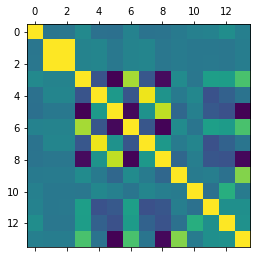

In [8]:
# Plot the correlation matrix for the dataframe
plt.matshow(df[df.columns[1:]].corr())

# Display the plot
plt.show()


In [9]:
df[df.columns[1:]].corr()

,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
duration,1.000000,-0.031444,-0.025069,0.104422,-0.060106,-0.068154,0.055428,-0.048015,-0.044145,0.004383,0.040973,0.057607,0.133962,0.034166
start_time,-0.031444,1.000000,0.999972,0.060069,0.077048,-0.019505,0.059375,0.076863,-0.020734,0.010733,-0.017142,-0.013703,-0.025482,0.022707
end_time,-0.025069,0.999972,1.000000,0.060553,0.076837,-0.019769,0.059426,0.076754,-0.020806,0.010704,-0.016907,-0.013589,-0.024830,0.022797
start_station,0.104422,0.060069,0.060553,1.000000,-0.252764,-0.696062,0.770185,-0.238695,-0.643735,0.119491,-0.023934,0.256965,0.246192,0.516307
start_lat,-0.060106,0.077048,0.076837,-0.252764,1.000000,0.215629,-0.245028,0.955978,0.177055,0.005165,0.085987,-0.270078,-0.169603,-0.052957
start_lon,-0.068154,-0.019505,-0.019769,-0.696062,0.215629,1.000000,-0.657591,0.168977,0.839985,-0.131725,0.039656,-0.224680,-0.278289,-0.685942
end_station,0.055428,0.059375,0.059426,0.770185,-0.245028,-0.657591,1.000000,-0.244972,-0.682208,0.119651,-0.039127,0.261004,0.236486,0.514276
end_lat,-0.048015,0.076863,0.076754,-0.238695,0.955978,0.168977,-0.244972,1.000000,0.208249,0.009943,0.076867,-0.275861,-0.160473,-0.038438
end_lon,-0.044145,-0.020734,-0.020806,-0.643735,0.177055,0.839985,-0.682208,0.208249,1.000000,-0.128876,0.029621,-0.241494,-0.259749,-0.661791
bike_id,0.004383,0.010733,0.010704,0.119491,0.005165,-0.131725,0.119651,0.009943,-0.128876,1.000000,0.009054,0.032139,-0.062981,0.685252


Using the correlation matrix is a good way to identify which variables in your dataset are highly correlated with one another. If two variables are highly correlated (i.e., have a correlation coefficient close to 1 or -1), then they are likely providing redundant information and it may be beneficial to remove one of the variables from your dataset.

To determine which variables to remove, you can look at the correlation matrix and identify pairs of variables that have a high absolute correlation coefficient (i.e., a coefficient close to 1 or -1). You can then decide which variable in each pair is less important or informative and remove it from the dataset.

It's also a good idea to consider the domain knowledge of your data when deciding which variables to keep or remove. For example, if you are working with data on a particular topic and have some understanding of the underlying relationships between the variables, you may be able to make informed decisions about which variables are more important to keep in the dataset based on this knowledge.

Keep in mind that removing correlated variables from your dataset can help reduce the dimensionality of your data, which can be useful for some machine learning models. However, it's important to be careful not to remove too many variables, as this can potentially lead to a loss of important information and lower model performance.

In [10]:
# Delete the end_time column from the dataframe
del(df["end_time"]) #0.999 correlation start_time
del(df["end_lon"]) # 0.98 correlation start_lon

In [11]:
df

,trip_id,duration,start_time,start_station,start_lat,start_lon,end_station,end_lat,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107.0,5.0,26032624.0,4312.0,34.066990,-118.290878,4410.0,34.063351,6168.0,30.0,0.0,0.0,0.0
1,124657587.0,9.0,26032627.0,3066.0,34.063389,-118.236160,3066.0,34.063389,17584.0,30.0,1.0,0.0,1.0
2,124658068.0,5.0,26032640.0,4410.0,34.063351,-118.296799,4312.0,34.066990,18920.0,30.0,0.0,0.0,1.0
3,124659747.0,20.0,26032664.0,3045.0,34.028511,-118.256668,4275.0,34.012520,6016.0,1.0,0.0,1.0,0.0
4,124660227.0,27.0,26032664.0,3035.0,34.048401,-118.260948,3049.0,34.056969,5867.0,30.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92119,130053092.0,8.0,26165072.0,3038.0,34.046822,-118.248352,3078.0,34.064281,19655.0,1.0,0.0,1.0,1.0
92120,130053090.0,15.0,26165078.0,4401.0,34.075611,-118.291862,4401.0,34.075611,18984.0,30.0,1.0,0.0,1.0
92121,130053089.0,1.0,26165080.0,3038.0,34.046822,-118.248352,3067.0,34.045181,12361.0,365.0,0.0,2.0,0.0
92122,130053088.0,22.0,26165081.0,3067.0,34.045181,-118.250237,3049.0,34.056969,16580.0,365.0,0.0,2.0,1.0


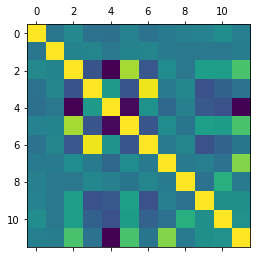

In [12]:
# Plot the correlation matrix for the dataframe
plt.matshow(df[df.columns[1:]].corr())

# Display the plot
plt.show()

In [13]:
df.isna().sum()

trip_id                0
duration               0
start_time             0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

In [14]:
# Import the normalize function from scikit-learn's preprocessing module
from sklearn.preprocessing import normalize

# Normalize the data in the dataframe
X = normalize(df[df.columns[1:]])

# Create a new dataframe with the normalized data and the original column names
df2 = pd.DataFrame(X, columns=df.columns[1:])
df2[df.columns[0]]=df[df.columns[0]]


In [15]:
df.describe()

,trip_id,duration,start_time,start_station,start_lat,start_lon,end_station,end_lat,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
count,9.212400e+04,92124.000000,9.212400e+04,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000,92124.000000
mean,1.274286e+08,33.168588,2.610075e+07,3484.899690,34.035105,-118.287212,3480.271026,34.035496,14470.194238,60.290977,0.166656,0.561428,0.855890
std,1.524134e+06,129.057841,3.751904e+04,611.483883,0.058153,0.072777,609.942741,0.057544,4658.715533,111.141364,0.372670,0.853864,0.689253
min,1.246571e+08,1.000000,2.603262e+07,3000.000000,33.710979,-118.495422,3000.000000,33.710979,5715.000000,1.000000,0.000000,0.000000,0.000000
25%,1.261375e+08,6.000000,2.606899e+07,3029.000000,34.037460,-118.280952,3028.000000,34.038609,12139.000000,1.000000,0.000000,0.000000,0.000000
50%,1.274911e+08,12.000000,2.610240e+07,3062.000000,34.046822,-118.258537,3062.000000,34.046822,16307.000000,30.000000,0.000000,0.000000,1.000000
75%,1.287379e+08,22.000000,2.613296e+07,4285.000000,34.051941,-118.248352,4285.000000,34.051102,17584.000000,30.000000,0.000000,1.000000,1.000000
max,1.303877e+08,1440.000000,2.616510e+07,4453.000000,34.177662,-118.231277,4453.000000,34.177662,19974.000000,999.000000,1.000000,5.000000,2.000000


The describe() function provides a summary of the central tendency, dispersion, and shape of the distribution of a set of data. It includes statistics such as the count, mean, standard deviation, minimum, maximum, and quartiles of the data.
The count values for all the columns are the same, which indicates that there are no missing values in the dataset.
The duration column has a minimum value of 1 and a maximum value of 1440, which could indicate that there are some very short and very long trips in the dataset. The standard deviation of 129.057841 could also suggest that the values in the duration column are somewhat spread out.
The start_station and end_station columns both have a range of 4453-3000=1453, which could indicate that there are a limited number of stations in the dataset.
The passholder_type and bike_type columns both have a range of 5 and 2, respectively, which could indicate that there are multiple categories or types of passholders and bikes in the dataset.
The bike_id column has a range of 19974-5715=14259, which could mean that there are a large number of bikes in the dataset. The standard deviation of 4658.715533 could also suggest that the values in the bike_id column are less spread out.


The mean values for the start_lat and start_lon columns are 34.035105 and -118.287212, respectively, which could be the latitude and longitude coordinates of the center of the area where the trips in the dataset originate. Similarly, the mean values for the end_lat and end_lon columns are 34.035496 and -118.252945, respectively, which could be the latitude and longitude coordinates of the center of the area where the trips in the dataset end.
The mean value for the plan_duration column is 60.290977, which could indicate the average duration of the subscription or membership plans of the users in the dataset.
The mean value for the trip_route_category column is 0.166656, which could indicate the proportion of one-way trips in the dataset.
The mean value for the passholder_type column is 0.561428, which could indicate the proportion of users in the dataset who hold annual or monthly passes.
The mean value for the bike_type column is 0.855890, which could indicate the proportion of electric bikes in the dataset.

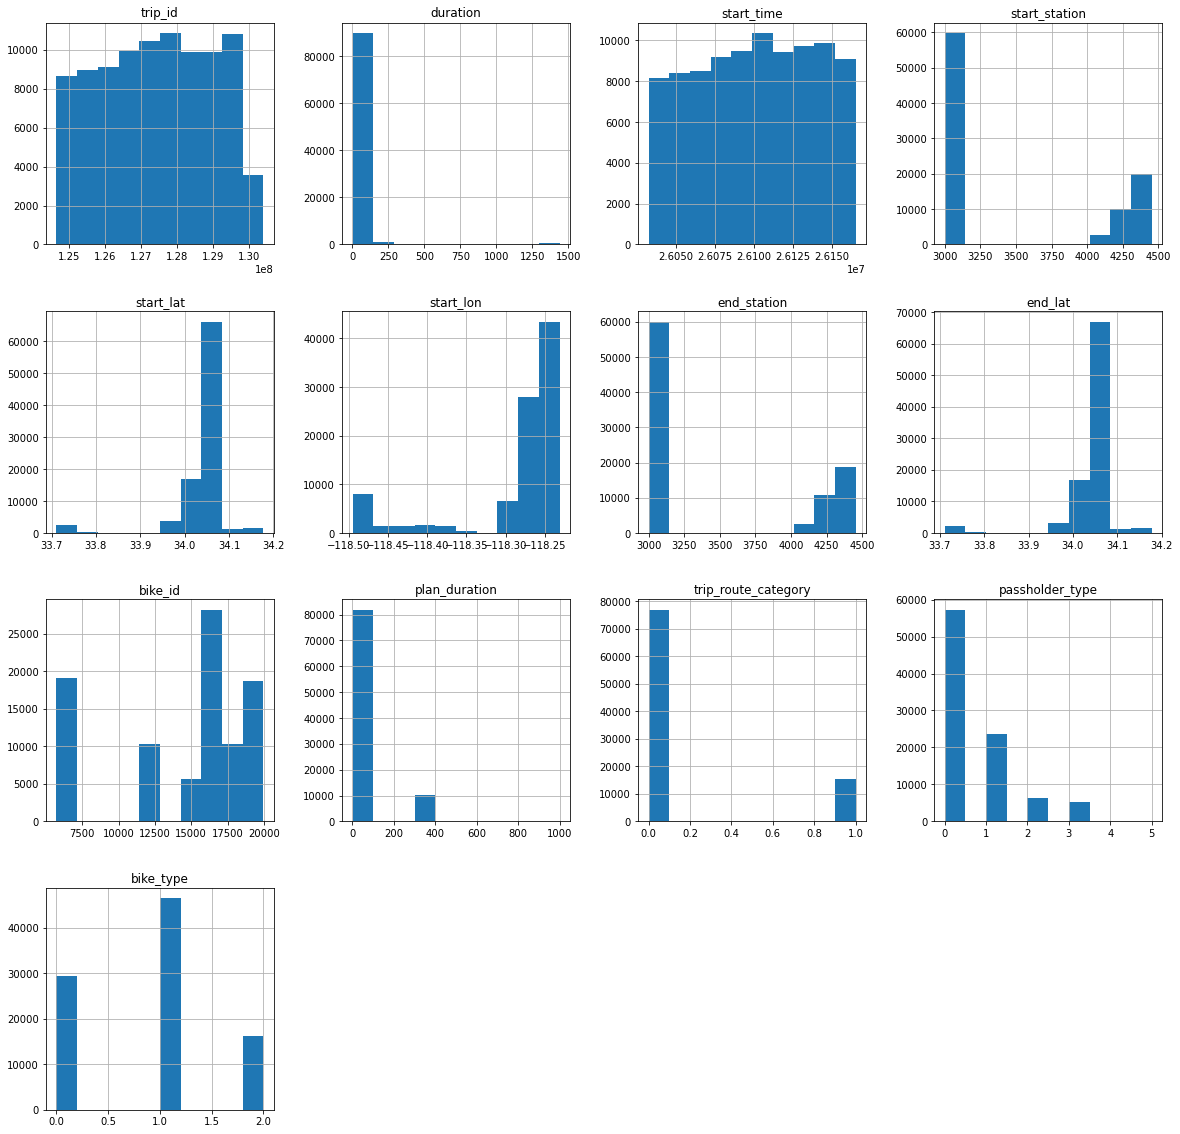

In [16]:
df.hist(figsize=(20,20))
plt.show()


we can see plan dutation and trip route cat have some atipically data